In [1]:
# Compute the derivative of N(t)
deriv_Nt(nt, K, r) = r*nt*(1-nt/K)

# Compute N(t + h)
next_Nt(nt, K, r, h) = nt + h*deriv_Nt(nt, K, r)

next_Nt (generic function with 1 method)

In [2]:
# 各種パラメータを定義
tmax = 10.0 # 終了時刻
r = 1.0 # パラメータ1
K = 10.0 #パラメータ2
N0 = 1.0 # 人口の初期値
numtimes  = 100 # 0 ≦ t < tmaxの分割数

h = tmax/numtimes

0.1

In [3]:
deriv_Nt(N0, K, r)

0.9

In [4]:
# 型安定性のチェック
@code_warntype deriv_Nt(N0, K, r)

MethodInstance for 

deriv_Nt(::

Float64, ::Float64, ::Float64)
  from deriv_Nt(nt, K, r) in Main at c:\Users\sekine\Desktop\tokuron\My\logistic\logistic.ipynb:2
Arguments
  #self#

::Core.Const(deriv_Nt)
  nt::Float64
  K::Float64
  r::Float64
Body::Float64


1 ─ %1 

= (nt / K)

::Float64
│   %2 = (1 - 

%1)::Float64
│   %3 = (r * nt * %2)::Float64
└──      return %3



In [8]:
results = Vector{Float64}(undef, numtimes+1)

# 初期値
results[1] = N0

# 時間発展
for t in 1:numtimes
    results[t+1] = next_Nt(results[t], K, r, h)
end


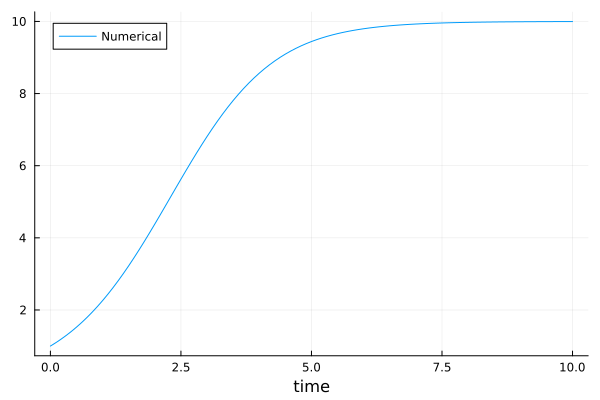

In [11]:
using Plots

times = LinRange(0, tmax, numtimes+1)
plot(times, results, label="Numerical", xlabel="time")

In [13]:
collect(times)

101-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7000000000000001
  0.8
  0.8999999999999999
  ⋮
  9.200000000000001
  9.3
  9.399999999999999
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0

In [14]:
exact_Nt(time) = K/(1+(K-N0) / N0 * exp(-r*time))

exact_Nt (generic function with 1 method)

In [19]:
results - exact_Nt.(times) 

101-element Vector{Float64}:
  0.0
 -0.0036687039095701923
 -0.007827317113933585
 -0.012490815495548757
 -0.017666169423784295
 -0.023350528815057725
 -0.029529382154351635
 -0.036174779336806795
 -0.043243730173342376
 -0.05067691007267383
  ⋮
  0.0019774162851895483
  0.001823829563965873
  0.001681389797948185
  0.001549384448244595
  0.001427133793431068
  0.001313991320406771
  0.0012093437268667628
  0.0011126106068672925
  0.0010232438809580913

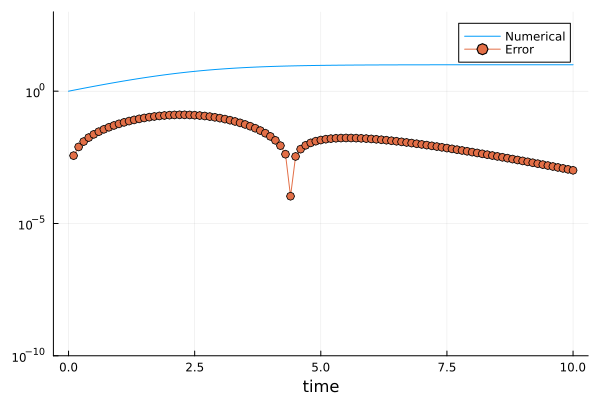

In [21]:
exact_Nt(time) = K/(1+(K-N0) / N0 * exp(-r*time))

p = plot(yaxis=:log, ylims=(1e-10, 1000),  xlabel="time")
plot!(p, times, results, label="Numerical")
plot!(p, times, abs.(results .- exact_Nt.(times)), marker=:o, label="Error")

In [ ]:
err = abs.(results . - exact_Nt.(times))

In [22]:
using DifferentialEquations

# ロジスティック方程式の定義
function logistic!(du, u, params, t)
    r, K = params
    du[1] = r * u[1] * (1 - u[1]/K)
end

# パラメータの設定
params = (r, K)

# 初期条件の設定
u0 = [1.0]  # 開始時点の人口サイズ

# 時間範囲の設定
tspan = (0.0, tmax)

# 問題の設定
prob = ODEProblem(logistic!, u0, tspan, params)

# 微分方程式の解 (5次のルンゲクッタ法)
sol = solve(prob, Tsit5(), abstol=1e-8, reltol=1e-8)
;

In [23]:
typeof(:x)

Symbol

In [29]:
typeof("x")
a = 1.0
b =1.0

1.0

In [31]:
objectid(a)
objectid(b)

0x617ebd74fa8c69b9

In [32]:
sol.u

64-element Vector{Vector{Float64}}:
 [1.0]
 [1.0106081044644712]
 [1.0393355128683432]
 [1.0791184336855089]
 [1.1283969977248853]
 [1.189569952965431]
 [1.2623871647176015]
 [1.348144589833155]
 [1.4472500748197608]
 [1.560731934380751]
 ⋮
 [9.96669953496994]
 [9.973584489361246]
 [9.979242149775008]
 [9.983853711145539]
 [9.98757936244528]
 [9.990560236685813]
 [9.992919983367432]
 [9.99476632409684]
 [9.995915673449131]

In [34]:
results_de = [u_[1] for u_ in sol.u ]

64-element Vector{Float64}:
 1.0
 1.0106081044644712
 1.0393355128683432
 1.0791184336855089
 1.1283969977248853
 1.189569952965431
 1.2623871647176015
 1.348144589833155
 1.4472500748197608
 1.560731934380751
 ⋮
 9.96669953496994
 9.973584489361246
 9.979242149775008
 9.983853711145539
 9.98757936244528
 9.990560236685813
 9.992919983367432
 9.99476632409684
 9.995915673449131

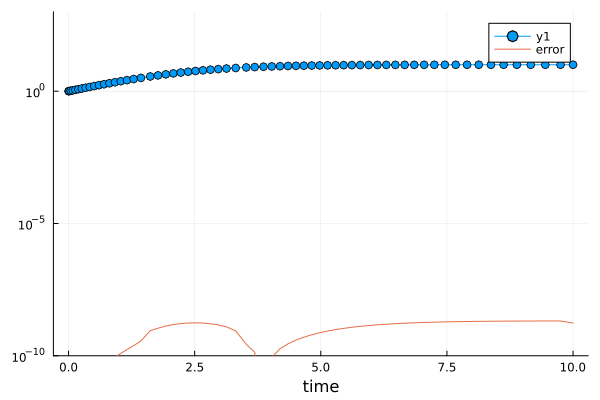

In [35]:
# 解のプロット

results_de = [u_[1] for u_ in sol.u]

p = plot(yaxis=:log, ylims=(1e-10, 1000),  xlabel="time")
plot!(p, sol.t, results_de, marker=:o)
plot!(p, sol.t, abs.(results_de .- exact_Nt.(sol.t)), label="error")